In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
df = pd.read_excel("_689829b5c78b9b71bd384ed8fb8714c1_TestExer-1-sales-round1.xlsx")
df.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


* (a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you
expect to find if you would fit a regression line to these data?

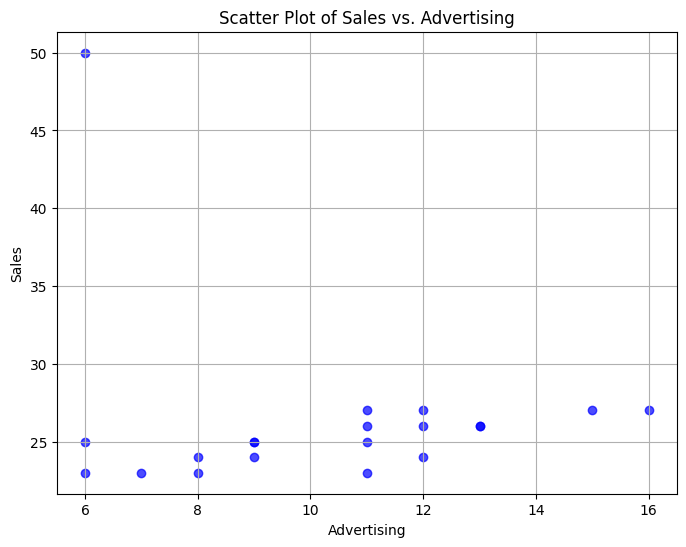

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Advertising"], df["Sales"], color="blue", alpha=0.7)
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Scatter Plot of Sales vs. Advertising")
plt.grid(True)

plt.show()

* (b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising
as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?

In [10]:
X = df["Advertising"]
X = sm.add_constant(X)  
Y = df["Sales"]

model = sm.OLS(Y, X).fit()

table = model.summary()
print(table)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.5002
Date:                Mon, 24 Feb 2025   Prob (F-statistic):              0.488
Time:                        23:20:54   Log-Likelihood:                -62.608
No. Observations:                  20   AIC:                             129.2
Df Residuals:                      18   BIC:                             131.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.6269      4.882      6.069      

* (c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this
histogram?

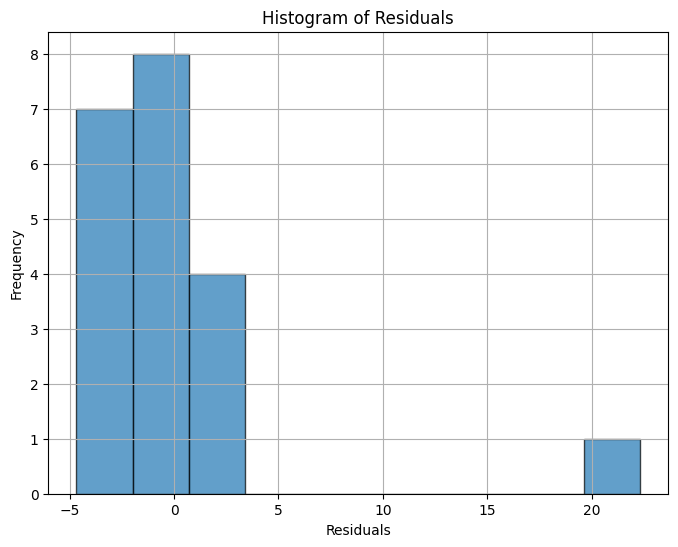

In [11]:
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

* The relationship between “Advertising” and “Sales” seems weak in this model.
The residuals probably do not follow a normal distribution, which may indicate that the simple linear model is not suitable.
It may be interesting to test data transformations, include more variables or consider non-linear models.

* (d) Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual
corresponds to the week with opening hours during the evening, how would you proceed to get a more
satisfactory regression model?

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     275.3
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.12e-13
Time:                        23:32:02   Log-Likelihood:                -27.800
No. Observations:                  20   AIC:                             61.60
Df Residuals:                      17   BIC:                             64.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.1250      0.955     22.124

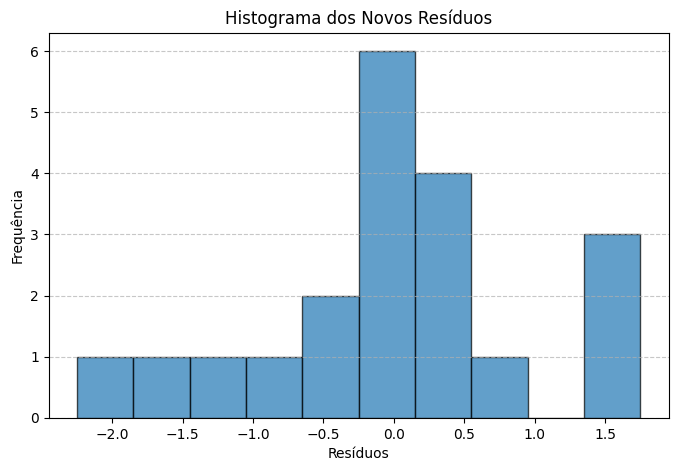

In [14]:
# Definir variáveis independente e dependente
X = df["Advertising"]
y = df["Sales"]

# Adicionar constante e ajustar o modelo inicial
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calcular os resíduos
df["Residuals"] = model.resid

# Definir um limiar para resíduos grandes (exemplo: 2x o desvio padrão)
threshold = 2 * df["Residuals"].std()

# Criar variável dummy para semanas com horários noturnos
df["Evening_Hours"] = (df["Residuals"].abs() > threshold).astype(int)

# Ajustar novo modelo incluindo a variável dummy
X_new = df[["Advertising", "Evening_Hours"]]
X_new = sm.add_constant(X_new)
model_new = sm.OLS(y, X_new).fit()

# Calcular novos resíduos
df["Residuals_New"] = model_new.resid

# Exibir resumo do novo modelo
print(model_new.summary())

# Plotar histograma dos novos resíduos
plt.figure(figsize=(8, 5))
plt.hist(df["Residuals_New"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Novos Resíduos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


* The introduction of the indicator variable for weeks with night-time opening greatly improved the model.
This type of approach is useful when there are external factors that explain variations in the data.

* (e) Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and
b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also
compute the standard error and t-value of b. Is b significantly different from 0?

In [17]:

X = sm.add_constant(df["Advertising"])
y = df["Sales"]
model = sm.OLS(y, X).fit()
df["Residuals"] = model.resid

threshold = 2 * df["Residuals"].std()
df["Evening_Hours"] = (df["Residuals"].abs() > threshold).astype(int)

df_filtered = df[df["Evening_Hours"] == 0]

X_filtered = sm.add_constant(df_filtered["Advertising"])
y_filtered = df_filtered["Sales"]

model_filtered = sm.OLS(y_filtered, X_filtered).fit()

b_coef = model_filtered.params["Advertising"]
b_std_err = model_filtered.bse["Advertising"]
b_t_value = model_filtered.tvalues["Advertising"]
b_p_value = model_filtered.pvalues["Advertising"]

print(f"Coeficiente b (Advertising): {b_coef:.3f}")
print(f"Erro padrão de b: {b_std_err:.3f}")
print(f"Valor t de b: {b_t_value:.3f}")
print(f"p-valor de b: {b_p_value:.6f}")

print(model_filtered.summary())

Coeficiente b (Advertising): 0.375
Erro padrão de b: 0.088
Valor t de b: 4.252
p-valor de b: 0.000538
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     18.08
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           0.000538
Time:                        23:38:28   Log-Likelihood:                -26.897
No. Observations:                  19   AIC:                             57.79
Df Residuals:                      17   BIC:                             59.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

C:\Users\2160030302\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


* The 𝑏 coefficient is positively significant and has a very small p-value (<0.01), indicating that there is a statistically significant relationship between Advertising and Sales.

* Impact of Outliers

The presence of an outlier (week with evening hours) distorted the relationship between advertising and sales, making the initial model unreliable.
After removing this week, the relationship between Advertising and Sales became statistically significant.
Importance of residual analysis

If we had only looked at the regression coefficients in Part (b), we might have wrongly concluded that Advertising does not influence sales.
However, by analyzing the residuals, we identified an atypical week that was negatively impacting the model.
Improved Model Interpretation

The revised model suggests that advertising spending does influence sales, but the presence of special events can alter this relationship.
This indicates that, in the real world, external factors such as opening hours may be more relevant than simply increasing advertising.
